# Local politics: small town Nebraska is further right than ever

**By Matt Waite**

In the 2016 election, 84 of Nebraska's 93 counties gave a higher percentage to a GOP candidate than any election since 2000. It's the most visible sign of a shift in rural Nebraska politcs that's been quietly unfolding for more than a decade. As most of the state's counties shrink, they're tilting to the right. And in the process, they're becoming less politically diverse, some dramatically so. 

In [1]:
library(ggplot2)
library(dplyr)
library(scales)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
pct <- read.csv("data/pctgop.csv")
head(pct)

,County,Year,PCTGOP
1,Adams,2016,69.88308533
2,Antelope,2016,84.37888199
3,Arthur,2016,90.11406844
4,Banner,2016,91.02564103
5,Blaine,2016,87.22044728
6,Boone,2016,80.18835019


The pctgop.csv file has a single record for each county and election year going back to 2000. The PCTGOP field is the percent of the vote that went to the GOP candidate for president that election. So in 2016, that was Donald J. Trump, in 2000 and 2004, it was George W. Bush, and so on. By charting each county, you can see the trend: With the exception of a noticeable dip for President Obama's 2008 election, the majority of counties bend up to the right, meaning a continuously higher percentage of the vote in those counties is going to the Republican candidate.

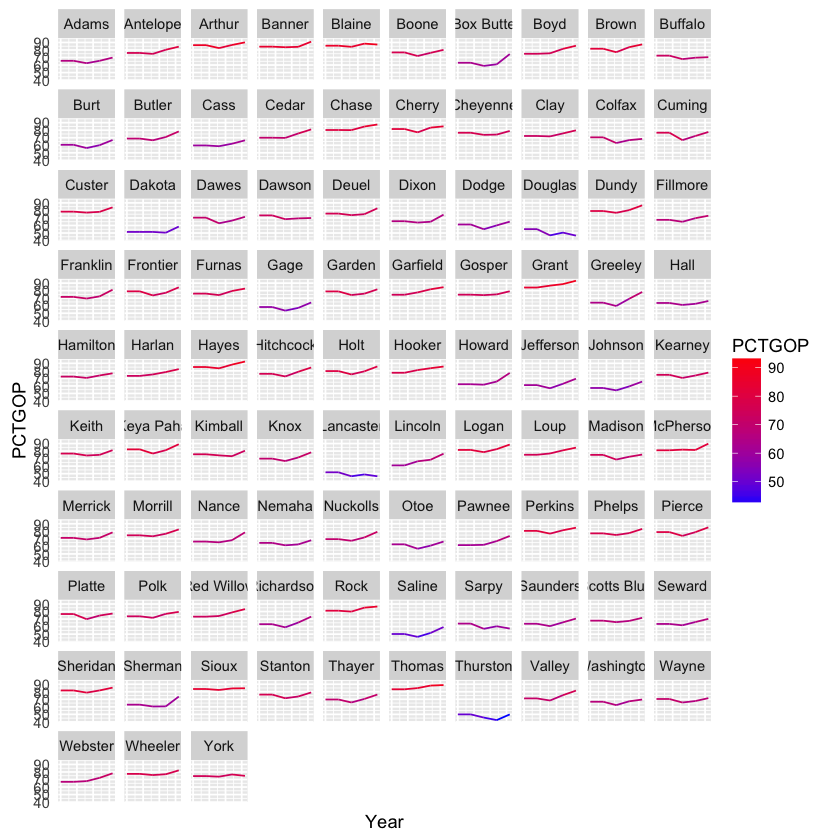

In [3]:
ggplot(pct, aes(x=Year, y=PCTGOP, group=County, colour = PCTGOP)) + geom_line() + theme(axis.text.x = element_blank(), axis.ticks = element_blank()) + scale_colour_gradient(low="blue", high="red") + facet_wrap(~County)

Viewed another way, we can see that Trump counties *vastly* outnumber counties where other GOP candidates did better.

In [4]:
tiltbar <- read.csv("data/tiltbar.csv")

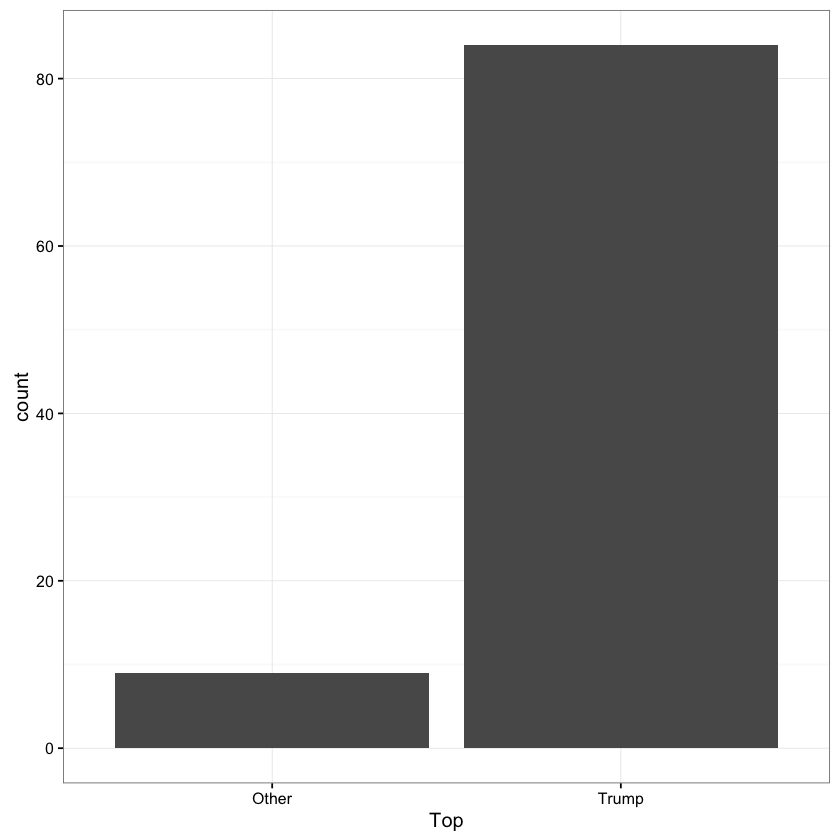

In [5]:
ggplot(aes(x=Top), data=tiltbar) + geom_bar() + theme_bw()

So that raises the question of what is going on in these counties? A partial answer statewide is that the number of registered Democrats is slowly shrinking while the number of registered Non Partisans is rising quickly.

In [6]:
statewidevoters <- read.csv("data/statewidevoters.csv")

In [7]:
head(statewidevoters)

,Year,Party,Registered
1,2016,Republican,582924
2,2012,Republican,558145
3,2008,Republican,558308
4,2004,Republican,575778
5,2000,Republican,537605
6,2016,Democrat,370227


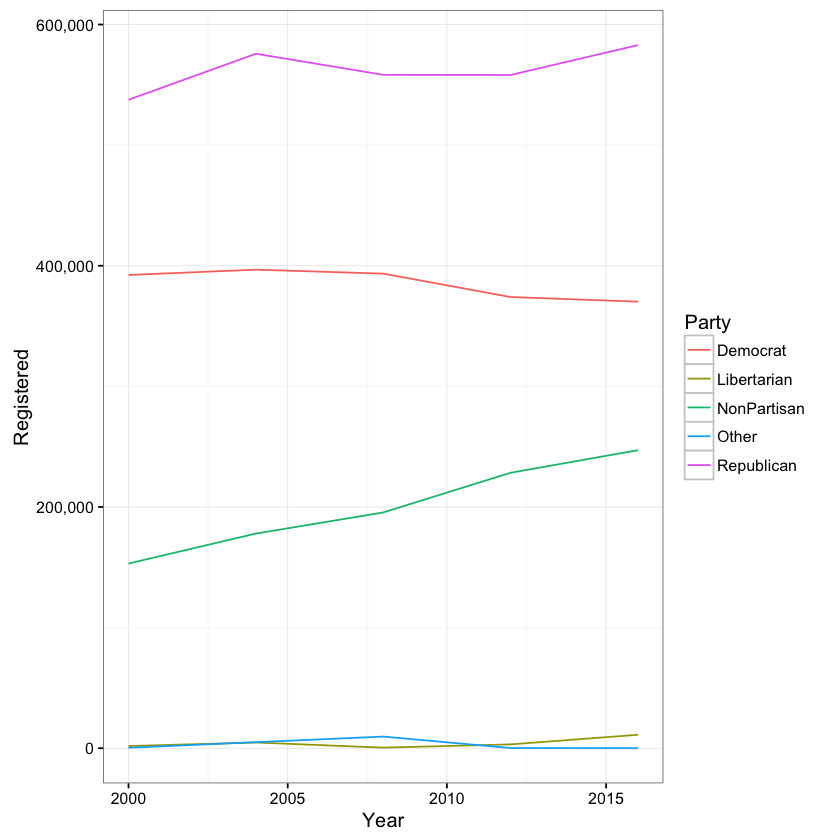

In [8]:
ggplot(statewidevoters, aes(x=Year, y=Registered, group=Party, colour = Party)) + geom_line() + scale_y_continuous(labels = comma) + theme_bw()

But that statewide trend masks a near collapse of the Democractic party in many counties. In the smaller places in Nebraska, the number of registered Democrats is plunging. 

In [9]:
voters <- read.csv("data/voters.csv")

In [10]:
head(voters)

,County,Year,Party,Voters
1,Adams,2016,Republican,10861
2,Antelope,2016,Republican,3123
3,Arthur,2016,Republican,289
4,Banner,2016,Republican,430
5,Blaine,2016,Republican,318
6,Boone,2016,Republican,2481


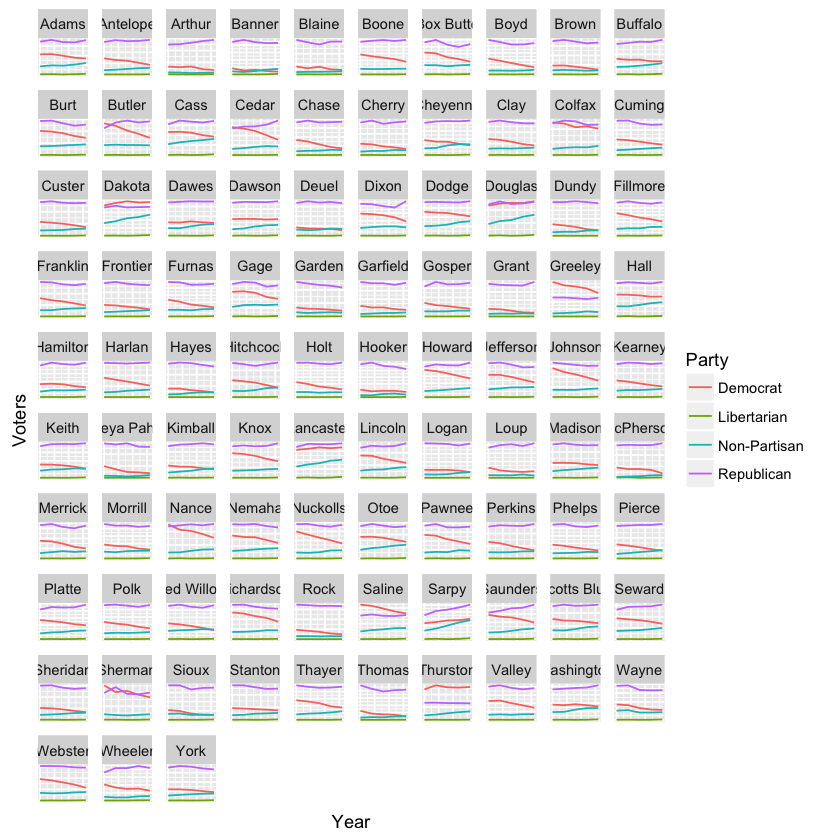

In [11]:
ggplot(voters, aes(x=Year, y=Voters, group=Party, colour = Party)) + geom_line() + theme(axis.text.x = element_blank(), axis.text.y = element_blank(), axis.ticks = element_blank()) + facet_wrap(~ County, scales = "free")

Since the 2000 presidential election in Nebraska, 67 counties have lost registered voters. It's no secret that parts of Nebraska are shrinking as people move away from rural areas toward cities. But of those 67 counties that shrunk, 64 of them went stronger for Trump than any other presidential candidate in the last five elections. And 61 of those shrinking counties became more Republican as a percentage over the same period of time. 

That shift to the right in smaller places has an impact on political discourse in small towns across the state. Using a measure of diversity -- the USA Today Diversity Index, which measures the probability that two people chosen at random will be different -- political diversity in Nebraska's smaller counties is plunging.

In [12]:
diversitychange <- read.csv("data/diversitychange.csv")

In [13]:
head(diversitychange)

,County,Change
1,Arthur,-29.06519483
2,Grant,-26.85397689
3,Loup,-24.0272237
4,Keya Paha,-21.92479171
5,Rock,-21.06215173
6,McPherson,-20.89193232


In [14]:
diversitychangesorted <- arrange(diversitychange, desc(Change)) %>% mutate(County = factor(County, County)) %>% mutate(pos = Change >= 0)

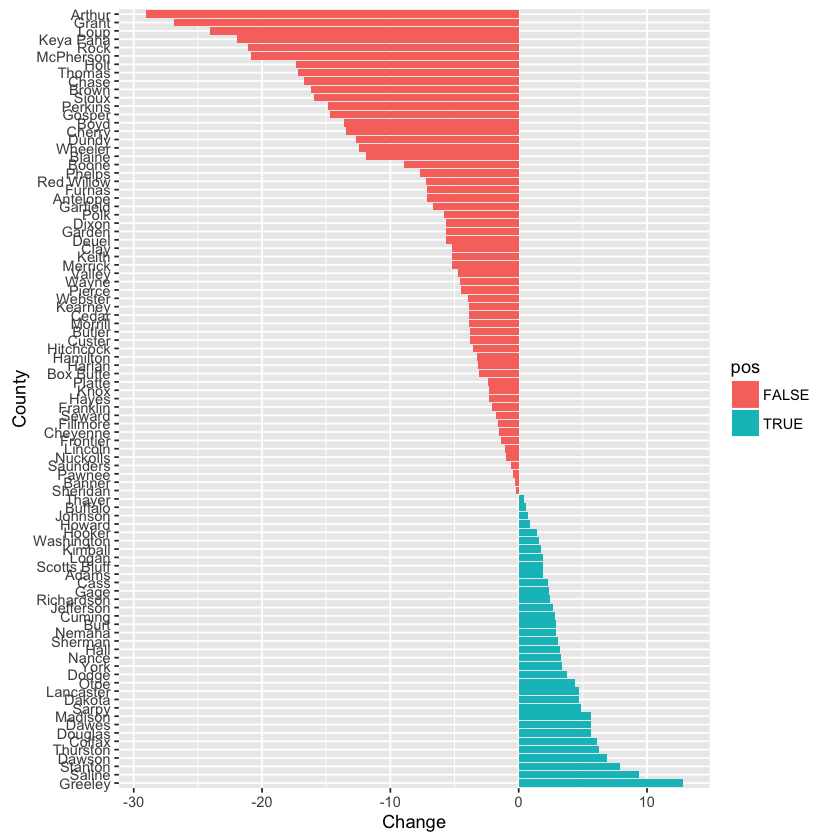

In [15]:
ggplot(diversitychangesorted, aes(x=County, y=Change, fill=pos)) + geom_bar(stat='identity', position='identity') + coord_flip()

In Arthur County, one of the smallest in the state and the nation as a whole, there's been a near 30 percent drop in political diversity since the 2000 presidential election. Put another way, the chance of finding two people at random in Arthur County of different politcal backrounds is plunging. Same in Grant, Loup, Keya Paha, Rock and McPherson counties. 

Counties with increasing political diversity tend to be the counties that are growing in population: Buffalo County, home of Kearney; Lancaster County, home of Lincoln; Douglas County, home of Omaha; Dakota County, home of South Sioux City; and so on. 